In [1]:
import pandas as pd

In [2]:
baseball = pd.read_csv("baseball.csv")

In [3]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [3]:
moneyball = baseball[baseball['Year'] < 2002]

In [5]:
moneyball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 15 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-null int64
W               902 non-null int64
OBP             902 non-null float64
SLG             902 non-null float64
BA              902 non-null float64
Playoffs        902 non-null int64
RankSeason      154 non-null float64
RankPlayoffs    154 non-null float64
G               902 non-null int64
OOBP            90 non-null float64
OSLG            90 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 112.8+ KB


#### Since wins are based on Runs scored (RS) and Runs allowed (RA), let's calculate the difference between them.

In [4]:
moneyball['RD'] = moneyball['RS'] - moneyball['RA']

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
moneyball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 16 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-null int64
W               902 non-null int64
OBP             902 non-null float64
SLG             902 non-null float64
BA              902 non-null float64
Playoffs        902 non-null int64
RankSeason      154 non-null float64
RankPlayoffs    154 non-null float64
G               902 non-null int64
OOBP            90 non-null float64
OSLG            90 non-null float64
RD              902 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 119.8+ KB


In [8]:
moneyball.head()

Team League  Year   RS   RA   W    OBP    SLG     BA  Playoffs  \
330  ANA     AL  2001  691  730  75  0.327  0.405  0.261         0   
331  ARI     NL  2001  818  677  92  0.341  0.442  0.267         1   
332  ATL     NL  2001  729  643  88  0.324  0.412  0.260         1   
333  BAL     AL  2001  687  829  63  0.319  0.380  0.248         0   
334  BOS     AL  2001  772  745  82  0.334  0.439  0.266         0   

     RankSeason  RankPlayoffs    G   OOBP   OSLG   RD  
330         NaN           NaN  162  0.331  0.412  -39  
331         5.0           1.0  162  0.311  0.404  141  
332         7.0           3.0  162  0.314  0.384   86  
333         NaN           NaN  162  0.337  0.439 -142  
334         NaN           NaN  161  0.329  0.393   27

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#### It seems there is a strong correlation between Runs Difference and the number of Wins (W)

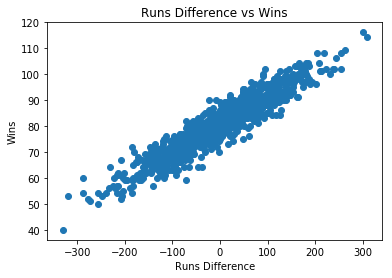

In [6]:
plt.scatter(moneyball['RD'], moneyball['W'])
plt.xlabel('Runs Difference')
plt.ylabel('Wins')
plt.title('Runs Difference vs Wins')

In [7]:
from sklearn import linear_model

In [8]:
linearRegression = linear_model.LinearRegression()

In [9]:
X_train = moneyball[['RD']]
y_train = moneyball[['W']]

In [10]:
linearRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print("Coefficients ", linearRegression.coef_)

Coefficients  [[ 0.10576562]]


In [16]:
print("Intercept ", linearRegression.intercept_)

Intercept  [ 80.88137472]


#### Basically, this means W = 0.1058(RD) + 80.8814
#### Claim : The number of wins should be >= 95
#### So, 0.1058(RD) + 80.8814 >= 95
#### RD = (95 - 80.8814)/0.1058 = 133.44612, approximately equal to 135 (claim made by Paul for the teams to make it to the playoffs)

#### If a baseball team scores 713 runs and allows 614 runs, how many games do we expect the team to win?

91 (W = 0.1058 * (713 - 614) + 80.8814)

#### How does a score team more runs?

#### The A's discovered that two baseball statistics were more important than anything else

1. On-Base Percentage (OBP) - Percentage of time a player gets on base (including walks)
2. Slugging Percentage (SLG) - How far a player gets on the bases on his turn (measures power)

#### Most teams focussed on Batting Average (BA - Getting on base by hitting the ball) but A's claimed that it was overvalued and OBP was the most important and SLG was important

In [11]:
X_train_runs_scored = baseball[['OBP', 'SLG', 'BA']]
y_train_runs_scored = baseball[['RS']]
linearRegression.fit(X_train_runs_scored, y_train_runs_scored)
print("Coefficients ", linearRegression.coef_)
print("Intercept ", linearRegression.intercept_)

Coefficients  [[ 2900.9403354   1533.88483471  -134.90497379]]
Intercept  [-806.08452907]


In [12]:
X_train_runs_scored_without_BA = baseball[['OBP', 'SLG']]
y_train_runs_scored_without_BA = baseball[['RS']]
linearRegression.fit(X_train_runs_scored_without_BA, y_train_runs_scored_without_BA)
print("Coefficients ", linearRegression.coef_)
print("Intercept ", linearRegression.intercept_)

Coefficients  [[ 2830.70470463  1517.57843237]]
Intercept  [-811.66242009]


In [14]:
baseball.isnull().any()

Team            False
League          False
Year            False
RS              False
RA              False
W               False
OBP             False
SLG             False
BA              False
Playoffs        False
RankSeason       True
RankPlayoffs     True
G               False
OOBP             True
OSLG             True
dtype: bool

In [15]:
baseball.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [17]:
baseball.tail()

Team League  Year   RS   RA    W    OBP    SLG     BA  Playoffs  \
1227  PHI     NL  1962  705  759   81  0.330  0.390  0.260         0   
1228  PIT     NL  1962  706  626   93  0.321  0.394  0.268         0   
1229  SFG     NL  1962  878  690  103  0.341  0.441  0.278         1   
1230  STL     NL  1962  774  664   84  0.335  0.394  0.271         0   
1231  WSA     AL  1962  599  716   60  0.308  0.373  0.250         0   

      RankSeason  RankPlayoffs    G  OOBP  OSLG  
1227         NaN           NaN  161   NaN   NaN  
1228         NaN           NaN  161   NaN   NaN  
1229         1.0           2.0  165   NaN   NaN  
1230         NaN           NaN  163   NaN   NaN  
1231         NaN           NaN  162   NaN   NaN

In [18]:
baseball.describe()

Year           RS           RA            W          OBP  \
count  1232.000000  1232.000000  1232.000000  1232.000000  1232.000000   
mean   1988.957792   715.081981   715.081981    80.904221     0.326331   
std      14.819625    91.534294    93.079933    11.458139     0.015013   
min    1962.000000   463.000000   472.000000    40.000000     0.277000   
25%    1976.750000   652.000000   649.750000    73.000000     0.317000   
50%    1989.000000   711.000000   709.000000    81.000000     0.326000   
75%    2002.000000   775.000000   774.250000    89.000000     0.337000   
max    2012.000000  1009.000000  1103.000000   116.000000     0.373000   

               SLG           BA     Playoffs  RankSeason  RankPlayoffs  \
count  1232.000000  1232.000000  1232.000000  244.000000    244.000000   
mean      0.397342     0.259273     0.198052    3.122951      2.717213   
std       0.033267     0.012907     0.398693    1.738349      1.095234   
min       0.301000     0.214000     0.000000    1.000000      1.000000   
25%       0.375000     0.251000     0.000000    2.000000      2.000000   
50%       0.396000     0.260000     0.000000    3.000000      3.000000   
75%       0.421000     0.268000     0.000000    4.000000      4.000000   
max       0.491000     0.294000     1.000000    8.000000      5.000000   

                 G        OOBP        OSLG  
count  1232.000000  420.000000  420.000000  
mean    161.918831    0.332264    0.419743  
std       0.624365    0.015295    0.026510  
min     158.000000    0.294000    0.346000  
25%     162.000000    0.321000    0.401000  
50%     162.000000    0.331000    0.419000  
75%     162.000000    0.343000    0.438000  
max     165.000000    0.384000    0.499000

#### If a baseball team's OBP is 0.311 and SLG is 0.405, how many runs do we expect the team to score?

683 (2830(0.311) + 1517(0.405) - 811)

Suppose you are the General Manager of a baseball team, and you are selecting TWO players for your team. You have a budget of $1,500,000, and you have the choice between the following players:

Player Name	OBP	SLG	Salary
Eric Chavez	0.338	0.540	1,400,000 
Jeremy Giambi	0.391	0.450	1,065,000 
Frank Menechino	0.369	0.374	295,000 
Greg Myers	0.313	0.447	800,000 
Carlos Pena	0.361	0.500	300,000 
Given your budget and the player statistics, which TWO players would you select?

Jeremy Giambi and Carlos Pena. Though Eric Chavez has a high RS, he is way too expensive whereas as the General Manager, you
could afford both Jeremy and Carlos since they have high RS too.